# Baseline Model

In [45]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('../data/final_df.csv', sep='|') 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   account_id                              100000 non-null  object 
 1   yeojohnson_revenue_in_eur_bin           100000 non-null  int64  
 2   is_EMEA                                 100000 non-null  int64  
 3   is_Webshop                              100000 non-null  int64  
 4   is_industry_FinanceInsuranceRealEstate  100000 non-null  int64  
 5   is_industry_Manufacturing               100000 non-null  int64  
 6   is_industry_Other                       100000 non-null  int64  
 7   is_industry_RetailTrade                 100000 non-null  int64  
 8   is_industry_Services                    100000 non-null  int64  
 9   is_industry_WholesaleTrade              100000 non-null  int64  
 10  license_value_score                     10000

In [26]:
df.head(10)

,account_id,yeojohnson_revenue_in_eur_bin,is_EMEA,is_Webshop,is_industry_FinanceInsuranceRealEstate,is_industry_Manufacturing,is_industry_Other,is_industry_RetailTrade,is_industry_Services,is_industry_WholesaleTrade,license_value_score,customer_value_score
0,ac6a99474410f1c59c91da3f0cf9cf3f,3,0,1,0,0,0,0,1,0,0.225903,0.404288
1,1cc66628ed41f3db5a55195e93277a04,3,0,1,0,0,0,0,0,1,0.692198,0.000000
2,db5f3cdd5629b9591b720b9b7e077df2,4,0,1,0,0,0,0,1,0,0.025903,0.058008
3,bebb4028688f519f36ed220855b0a62f,4,0,0,0,0,0,0,1,0,0.825945,0.703012
4,507c0bfb67895d773e3f8bd33b861d09,4,0,0,1,0,0,0,0,0,0.826668,0.467596
5,b1267a5b953b7267de811510f838172b,3,0,1,0,0,0,1,0,0,0.172568,0.270317
6,3315ad169d4d2e9080f1377c44377c7c,3,0,0,0,0,0,0,1,0,0.784642,0.863665
7,8ca7b69eda1a06b32e60fff1c6db3b28,4,0,0,0,0,1,0,0,0,0.530824,0.608520
8,5bd2eea4e2320b9246b41a8f54fb02d2,2,0,0,0,0,0,0,1,0,0.925757,0.625388
9,bbfb03bca60fb0185be3f36d12c99b3f,3,0,0,0,0,0,0,1,0,0.864130,0.635761


In [27]:
# Extract features columns excluding 'account_id'
features_df = df.drop(columns=['account_id'])

# Convert DataFrame to numpy array
features = features_df.to_numpy()

## Determine the number of clusters(k)

In [28]:
# Define a range of k values to test
k_range = range(1, 20)

wcss = []
for k in k_range:
    print('Now on k {}'.format(k))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    wcss.append(kmeans.inertia_)

Now on k 1
Now on k 2
Now on k 3
Now on k 4
Now on k 5
Now on k 6
Now on k 7
Now on k 8
Now on k 9
Now on k 10
Now on k 11
Now on k 12
Now on k 13
Now on k 14
Now on k 15
Now on k 16
Now on k 17
Now on k 18
Now on k 19


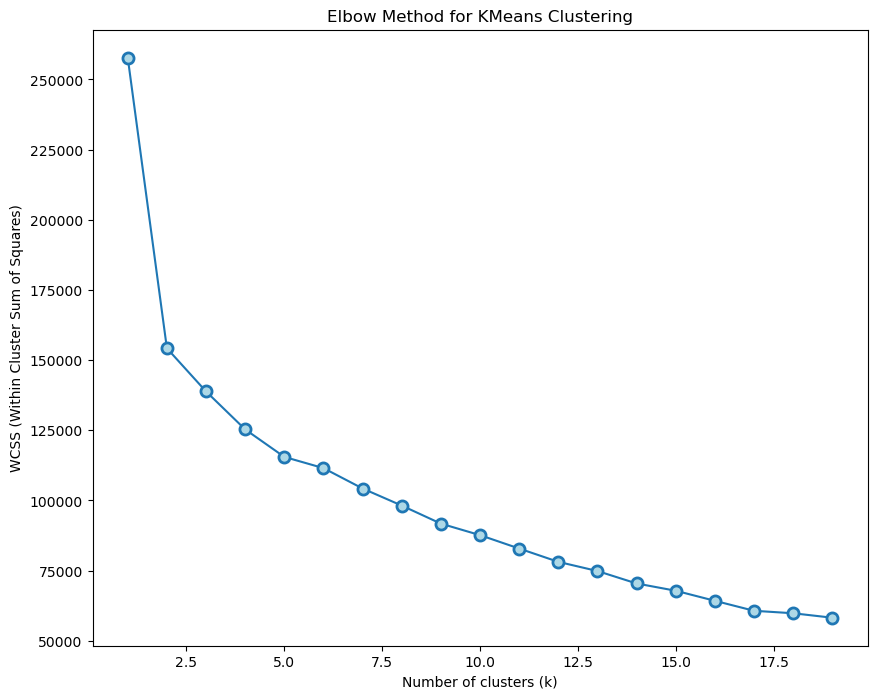

In [29]:
# Plotting WCSS vs k to identify the elbow point
plt.figure(figsize=(10, 8))
plt.plot(k_range, wcss, 'o-', markerfacecolor='lightblue', markeredgewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)
cluster_labels = kmeans.labels_
df['cluster_kmeans'] = kmeans.predict(features)
df.groupby(['cluster_kmeans']).mean()

,yeojohnson_revenue_in_eur_bin,is_EMEA,is_Webshop,is_industry_FinanceInsuranceRealEstate,is_industry_Manufacturing,is_industry_Other,is_industry_RetailTrade,is_industry_Services,is_industry_WholesaleTrade,license_value_score,customer_value_score
cluster_kmeans,,,,,,,,,,,
0,3.396045,0.534190,0.467943,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.492956,0.405823
1,1.446483,0.874962,0.526759,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.416872,0.412305
2,3.526295,0.673345,0.442775,0.162866,0.000000,0.373841,0.177321,0.0,0.285972,0.498758,0.421493
3,3.621728,0.674785,0.419606,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.510666,0.436505
4,1.559790,0.902354,0.538406,0.163449,0.155445,0.292768,0.242971,0.0,0.145368,0.384073,0.363683


In [31]:
df.mean()

yeojohnson_revenue_in_eur_bin             2.500000
is_EMEA                                   0.756630
is_Webshop                                0.489590
is_industry_FinanceInsuranceRealEstate    0.075670
is_industry_Manufacturing                 0.135660
is_industry_Other                         0.154230
is_industry_RetailTrade                   0.097740
is_industry_Services                      0.437280
is_industry_WholesaleTrade                0.099420
license_value_score                       0.450241
customer_value_score                      0.404184
cluster_kmeans                            1.960550
dtype: float64

In [32]:
df.cluster_kmeans.value_counts()

1    26384
4    23616
2    22761
0    17344
3     9895
Name: cluster_kmeans, dtype: int64

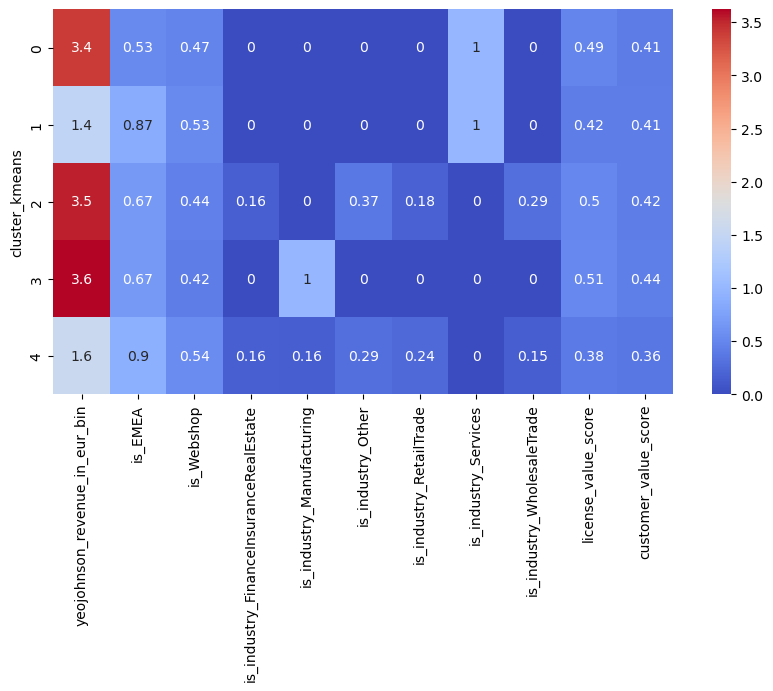

In [39]:
# Visualize the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.groupby(['cluster_kmeans']).mean(), cmap='coolwarm', annot=True)
plt.show()

In [46]:
clusters=pd.DataFrame(features,columns=features_df.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()